# Etapas

### Etapa 1: Análise Exploratória de Dados
- 1.1: Realizar Importação de Dados e Primeira Análise
- 1.2: Verificar Valores Nulos
- 1.3: Verificar Valores Únicos
- 1.4: Realizar Análise Gráfica

### Etapa 2: Preparação de Dados
- 2.1: Excluir Coluna de ID
- 2.1: Tratar Valores Ausentes
- 2.2: Tratar Colunas por Mapeamento
- 2.4: One Hot Encoding
- 2.5: Divisão de Dados Padrão
- 2.6: Undersampling
- 2.7: SMOTE

### Capítulo 3: Construção de Modelos de Machine Learning
- 3.1: Regressão Logística
- 3.2: Random Forest
- 3.3: Gradient Boosting
- 3.4: Máquina de Vetores de Suporte (SVM)
- 3.5: Rede Neural Sequencial

### Capítulo 4: Teste de Modelo e Conclusão

# Etapa 1: Análise Exploratória de Dados

In [170]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

### 1.1: Realizar Importação de Dados e Primeira Análise

In [171]:
churn_df_raw = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv", na_values=(' '))

churn_df_raw

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [172]:
churn_df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [173]:
churn_df_raw.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


### 1.2: Verificar Valores Nulos

In [174]:
churn_df_raw.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

### 1.3: Verificar Valores Únicos

In [175]:
colunas_verificar = ['gender', 'SeniorCitizen']

for coluna in colunas_verificar:
    valores_unicos = churn_df_raw[coluna].unique()
    print(f"Unique values for the column '{coluna}': {valores_unicos}")

Unique values for the column 'gender': ['Female' 'Male']
Unique values for the column 'SeniorCitizen': [0 1]


In [176]:
colunas_binarias_verificar = ['Partner', 'Dependents', 'PhoneService','PaperlessBilling', 'Churn']

for coluna in colunas_binarias_verificar:
    valores_unicos = churn_df_raw[coluna].unique()  
    print(f"Valores Únicos por Coluna '{coluna}': {valores_unicos}")

Valores Únicos por Coluna 'Partner': ['Yes' 'No']
Valores Únicos por Coluna 'Dependents': ['No' 'Yes']
Valores Únicos por Coluna 'PhoneService': ['No' 'Yes']
Valores Únicos por Coluna 'PaperlessBilling': ['Yes' 'No']
Valores Únicos por Coluna 'Churn': ['No' 'Yes']


### 1.4: Realizar Análise Gráfica

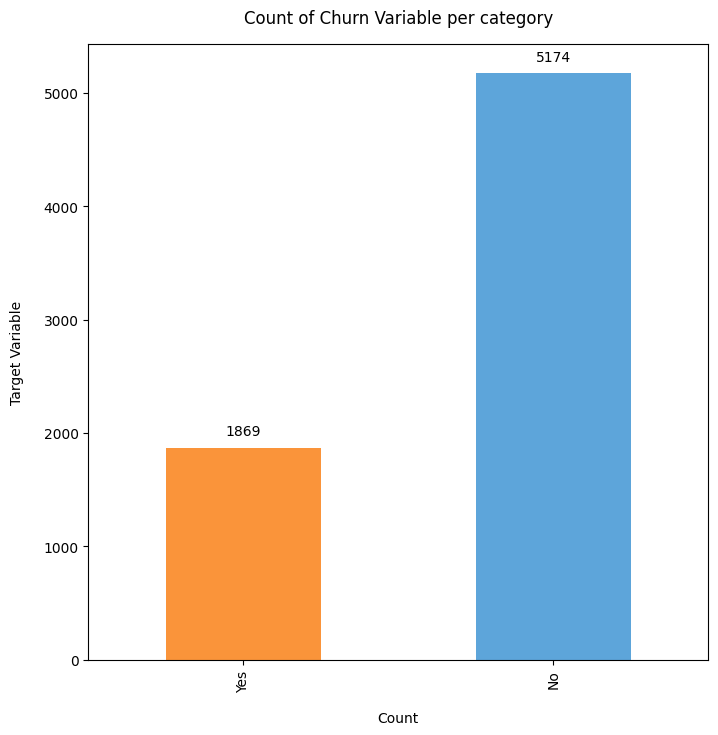

In [177]:
ordered_counts = churn_df_raw['Churn'].value_counts()[['Yes', 'No']]

colors = ['#FA943A', '#5DA5DA'] 

ax = ordered_counts.plot(kind='bar', figsize=(8, 8), color=colors)

for i in ax.patches:
    ax.text(i.get_x() + i.get_width()/2, i.get_height() + ax.get_ylim()[1]*0.02, str(i.get_height()), ha='center', fontsize=10)

plt.xlabel("Count", labelpad=14)
plt.ylabel("Target Variable", labelpad=14)
plt.title("Count of Churn Variable per category", y=1.02)

plt.show()

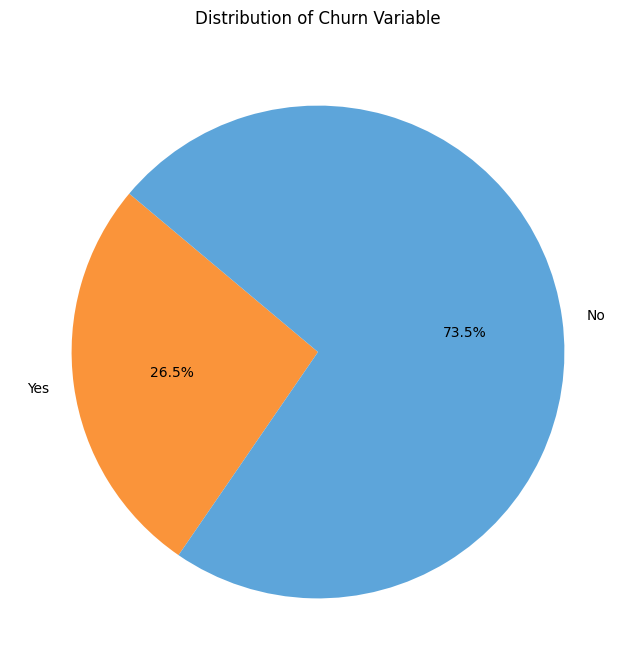

In [178]:
ordered_counts = churn_df_raw['Churn'].value_counts()[['Yes', 'No']]

plt.figure(figsize=(8, 8))
plt.pie(ordered_counts, labels=ordered_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)

plt.gca().set_aspect('equal')
plt.title("Distribution of Churn Variable", y=1.02)

plt.show()

A variável alvo do conjunto de dados está desbalanceada. 

# Etapa 2: Preparação de Dados

In [179]:
churn_df_clean = churn_df_raw.copy()

### 2.1: Excluir Coluna de ID

In [180]:
churn_df_clean = churn_df_clean.drop(columns=['customerID'])

churn_df_clean.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### 2.2: Tratar Valores Ausentes

In [181]:
def tratar_valores_ausentes(dataframe, coluna):
    valor_mediana = dataframe[coluna].median()
    dataframe[coluna] = dataframe[coluna].fillna(valor_mediana)

In [182]:
tratar_valores_ausentes(churn_df_clean, 'TotalCharges')

churn_df_clean.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### 2.3: Transformar Colunas por Mapeamento

In [183]:
def transformar_colunas_mapeamento(dataframe, colunas, mapeamento):
    for coluna in colunas:
        dataframe[coluna] = dataframe[coluna].replace(mapeamento)

In [184]:
colunas = {'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn'}

mapeamento = {'Yes': 1, 'No':0}

transformar_colunas_mapeamento(churn_df_clean, colunas, mapeamento)

In [185]:
mapeamento_genero = {'Female':1, 'Male':0}

transformar_colunas_mapeamento(churn_df_clean, ['gender'], mapeamento_genero)

In [186]:
churn_df_clean.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,0,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,0,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,0,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,1,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


### 2.4: One-Hot Encoding

In [187]:
colunas_encode = ['MultipleLines', 'InternetService', 'OnlineSecurity', 
                     'OnlineBackup', 'DeviceProtection', 'TechSupport', 
                     'StreamingTV', 'StreamingMovies', 'Contract', 
                     'PaymentMethod']

churn_df_clean = pd.get_dummies(churn_df_clean, columns=colunas_encode, drop_first=True)

In [188]:
colunas_bool = churn_df_clean.select_dtypes(include='bool').columns

churn_df_clean[colunas_bool] = churn_df_clean[colunas_bool].astype(int)

churn_df_clean.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,1,29.85,29.85,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,34,1,0,56.95,1889.50,0,...,0,0,0,0,0,1,0,0,0,1
2,0,0,0,0,2,1,1,53.85,108.15,1,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,45,0,0,42.30,1840.75,0,...,1,0,0,0,0,1,0,0,0,0
4,1,0,0,0,2,1,1,70.70,151.65,1,...,0,0,0,0,0,0,0,0,1,0


In [189]:
correlation_matrix = churn_df_clean.corr()
correlations = correlation_matrix["Churn"].abs().sort_values(ascending=False)

# Exibir as maiores correlações com a variável alvo
print(correlations)

Churn                                    1.000000
tenure                                   0.352229
InternetService_Fiber optic              0.308020
Contract_Two year                        0.302253
PaymentMethod_Electronic check           0.301919
OnlineBackup_No internet service         0.227890
TechSupport_No internet service          0.227890
StreamingMovies_No internet service      0.227890
DeviceProtection_No internet service     0.227890
StreamingTV_No internet service          0.227890
InternetService_No                       0.227890
OnlineSecurity_No internet service       0.227890
TotalCharges                             0.199037
MonthlyCharges                           0.193356
PaperlessBilling                         0.191825
Contract_One year                        0.177820
OnlineSecurity_Yes                       0.171226
TechSupport_Yes                          0.164674
Dependents                               0.164221
SeniorCitizen                            0.150889


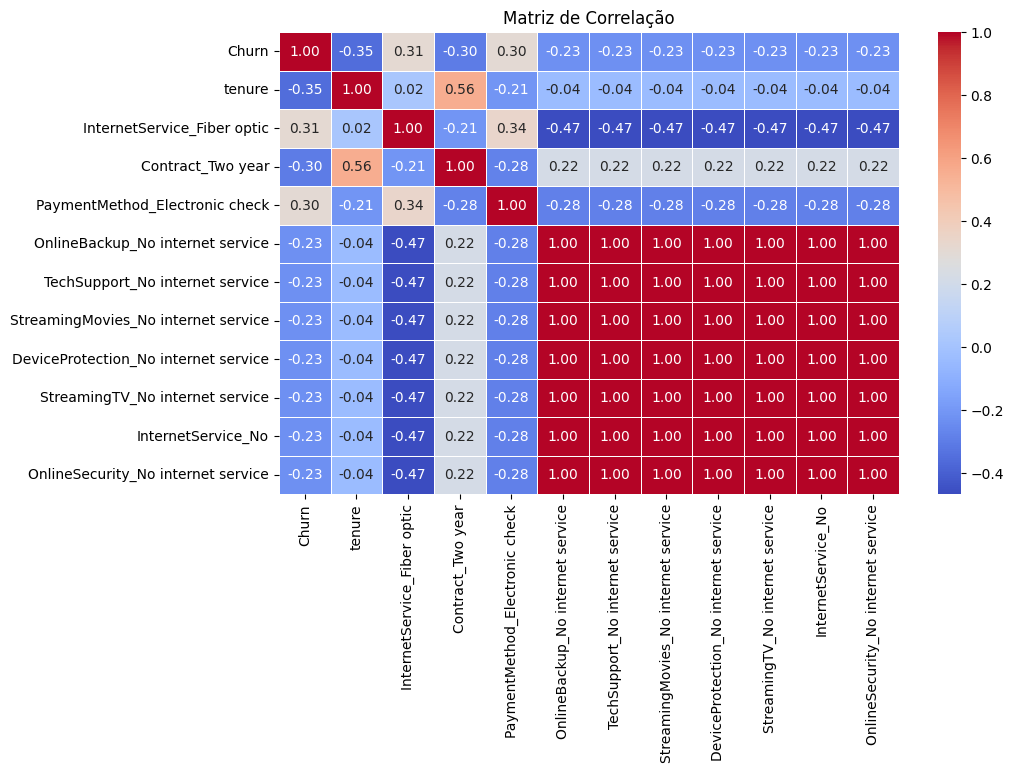

In [ ]:
# Selecionar apenas as colunas com correlação acima de um certo limiar (ex: 0.2)
high_corr_features = correlations[correlations > 0.2].index
filtered_corr_matrix = correlation_matrix.loc[high_corr_features, high_corr_features]

# Plotar a matriz de correlação filtrada
plt.figure(figsize=(10, 6))
sns.heatmap(filtered_corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Matriz de Correlação")

plt.show()

Ao filtrar as colunas com correlação superior a 0.2, obtive melhores resultados nos algoritmos padrão. No entanto, os hiperparâmetros otimizados para o Gradient Boosting ainda produziram um desempenho superior sem essa seleção de colunas, por isso escolhi esse modelo como o final. 

No futuro, pretendo testar a busca por hiperparâmetros em outros modelos combinada com a seleção de features por correlação, pois isso pode trazer melhorias. No momento, a execução de Grid Search ou Random Search demanda muito tempo.

### 2.5: Divisão de Dados Padrão

In [191]:
from sklearn.model_selection import train_test_split

X = churn_df_clean.drop(columns=['Churn'])
y = churn_df_clean['Churn']

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42) 

print("Shape of training set:", X_train.shape, y_train.shape)
print("Shape of validation set:", X_val.shape, y_val.shape)
print("Shape of test set:", X_test.shape, y_test.shape)

Shape of training set: (4225, 30) (4225,)
Shape of validation set: (1409, 30) (1409,)
Shape of test set: (1409, 30) (1409,)


In [192]:
pd.Series(y_train).value_counts(), pd.Series(y_val).value_counts(), pd.Series(y_test).value_counts()

(Churn
 0    3088
 1    1137
 Name: count, dtype: int64,
 Churn
 0    1051
 1     358
 Name: count, dtype: int64,
 Churn
 0    1035
 1     374
 Name: count, dtype: int64)

### 2.6: Undersampling

In [193]:
from imblearn.under_sampling import RandomUnderSampler

undersampler = RandomUnderSampler(random_state=42)

X_train_us, y_train_us = undersampler.fit_resample(X_train, y_train)

print("Shape of training set after undersampling:", X_train_us.shape, y_train_us.shape)

Shape of training set after undersampling: (2274, 30) (2274,)


In [194]:
pd.Series(y_train_us).value_counts()

Churn
0    1137
1    1137
Name: count, dtype: int64

### 2.7: SMOTE

In [195]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [196]:
pd.Series(y_train_smote).value_counts()

Churn
0    3088
1    3088
Name: count, dtype: int64

# Etapa 3: Construção de Modelos de Machine Learning

### 3.1: Regressão Logística

- Padrão

In [197]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

logistic_model = LogisticRegression(random_state=42)

logistic_model.fit(X_train, y_train)

print(classification_report(y_val, logistic_model.predict(X_val), target_names=['Not Churn', 'Churn']))

              precision    recall  f1-score   support

   Not Churn       0.85      0.89      0.87      1051
       Churn       0.63      0.54      0.58       358

    accuracy                           0.80      1409
   macro avg       0.74      0.72      0.73      1409
weighted avg       0.79      0.80      0.80      1409



- Undersampling

In [198]:
logistic_model.fit(X_train_us, y_train_us)

print(classification_report(y_val, logistic_model.predict(X_val), target_names=['Not Churn', 'Churn']))

              precision    recall  f1-score   support

   Not Churn       0.91      0.75      0.82      1051
       Churn       0.51      0.78      0.62       358

    accuracy                           0.75      1409
   macro avg       0.71      0.76      0.72      1409
weighted avg       0.81      0.75      0.77      1409



- SMOTE

In [199]:
logistic_model.fit(X_train_smote, y_train_smote)

print(classification_report(y_val, logistic_model.predict(X_val), target_names=['Not Churn', 'Churn']))

              precision    recall  f1-score   support

   Not Churn       0.88      0.81      0.84      1051
       Churn       0.55      0.67      0.60       358

    accuracy                           0.77      1409
   macro avg       0.71      0.74      0.72      1409
weighted avg       0.79      0.77      0.78      1409



### 3.2: Random Forest

- Padrão

In [200]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)

rf.fit(X_train, y_train)
print(classification_report(y_val, rf.predict(X_val), target_names=['Not Churn', 'Churn']))

              precision    recall  f1-score   support

   Not Churn       0.83      0.90      0.86      1051
       Churn       0.62      0.46      0.53       358

    accuracy                           0.79      1409
   macro avg       0.72      0.68      0.70      1409
weighted avg       0.78      0.79      0.78      1409



- Undersampling

In [201]:
rf.fit(X_train_us, y_train_us)

print(classification_report(y_val, rf.predict(X_val), target_names=['Not Churn', 'Churn']))

              precision    recall  f1-score   support

   Not Churn       0.89      0.76      0.82      1051
       Churn       0.50      0.72      0.59       358

    accuracy                           0.75      1409
   macro avg       0.70      0.74      0.71      1409
weighted avg       0.79      0.75      0.76      1409



- SMOTE

In [202]:
rf.fit(X_train_smote, y_train_smote)

print(classification_report(y_val, rf.predict(X_val), target_names=['Not Churn', 'Churn']))

              precision    recall  f1-score   support

   Not Churn       0.86      0.85      0.86      1051
       Churn       0.58      0.59      0.59       358

    accuracy                           0.79      1409
   macro avg       0.72      0.72      0.72      1409
weighted avg       0.79      0.79      0.79      1409



### 3.3: Gradient Boosting

- Padrão

In [203]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()

gbc.fit(X_train, y_train)

print(classification_report(y_val, gbc.predict(X_val), target_names=['Not Churn', 'Churn']))

              precision    recall  f1-score   support

   Not Churn       0.83      0.91      0.87      1051
       Churn       0.63      0.46      0.53       358

    accuracy                           0.79      1409
   macro avg       0.73      0.68      0.70      1409
weighted avg       0.78      0.79      0.78      1409



- Undersampling

In [204]:
gbc.fit(X_train_us, y_train_us)

print(classification_report(y_val, gbc.predict(X_val), target_names=['Not Churn', 'Churn']))

              precision    recall  f1-score   support

   Not Churn       0.91      0.73      0.81      1051
       Churn       0.50      0.78      0.61       358

    accuracy                           0.74      1409
   macro avg       0.70      0.76      0.71      1409
weighted avg       0.80      0.74      0.76      1409



- SMOTE

In [205]:
gbc.fit(X_train_smote, y_train_smote)

print(classification_report(y_val, gbc.predict(X_val), target_names=['Not Churn', 'Churn']))

              precision    recall  f1-score   support

   Not Churn       0.87      0.82      0.84      1051
       Churn       0.55      0.66      0.60       358

    accuracy                           0.78      1409
   macro avg       0.71      0.74      0.72      1409
weighted avg       0.79      0.78      0.78      1409



### 3.4: SVC

In [206]:
from sklearn.svm import LinearSVC
 
svc = LinearSVC(class_weight='balanced', random_state=42)

svc.fit(X_train, y_train)

print(classification_report(y_val, svc.predict(X_val), target_names=['Not Churn', 'Churn']))

              precision    recall  f1-score   support

   Not Churn       0.92      0.72      0.81      1051
       Churn       0.50      0.82      0.62       358

    accuracy                           0.75      1409
   macro avg       0.71      0.77      0.72      1409
weighted avg       0.81      0.75      0.76      1409



O modelo SVC não necessariamente precisa de balanceamento porque ele busca encontrar um hiperplano ótimo que separa as classes, e sua função de custo já considera margens e suportes para lidar com casos desbalanceados.

Além disso, o parâmetro class_weight="balanced" foi usado para ajustar automaticamente o impacto das classes desbalanceadas.

### 3.5: Rede Neural Sequencial

In [207]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model_nn = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5), 
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  
])

model_nn.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model_nn.fit(X_train_us, y_train_us, epochs=50, batch_size=64, validation_data=(X_val, y_val), verbose=0)

evaluation = model_nn.evaluate(X_val, y_val)
print("Loss:", evaluation[0])
print("Accuracy:", evaluation[1])

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7687 - loss: 0.6863
Loss: 0.6875273585319519
Accuracy: 0.7665010690689087


In [208]:
y_pred_prob = model_nn.predict(X_val)

y_pred = (y_pred_prob > 0.5).astype(int)

print(classification_report(y_val, y_pred, target_names=['Not Churn', 'Churn']))

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
              precision    recall  f1-score   support

   Not Churn       0.79      0.94      0.86      1051
       Churn       0.60      0.24      0.35       358

    accuracy                           0.77      1409
   macro avg       0.69      0.59      0.60      1409
weighted avg       0.74      0.77      0.73      1409



# Etapa 4: Teste de Modelo e Conclusão

- Grid Search utilizada para encontrar os melhores hiperparâmetros para o modelo Gradient Boosting Classifier.

In [209]:
# from sklearn.model_selection import GridSearchCV

# # Define the hyperparameters you want to adjust
# param_grid = {
#     'n_estimators': [50, 100, 150],
#     'learning_rate': [0.05, 0.1, 0.2],
#     # Add other hyperparameters you want to adjust here
# }

# # Create a Gradient Boosting classifier
# gbc = GradientBoostingClassifier(random_state=42)

# # Create a GridSearchCV object
# grid_search = GridSearchCV(gbc, param_grid, cv=5, scoring='f1', n_jobs=-1)

# # Train the model using the imbalanced dataset
# grid_search.fit(X_train_us, y_train_us)

# # Print the best hyperparameters found
# print("Best hyperparameters:", grid_search.best_params_)

# # Generate the classification report for the original validation set
# print("Classification Report:")
# print(classification_report(y_val, grid_search.best_estimator_.predict(X_val), target_names=['Not Churn', 'Churn']))

In [ ]:
# Instantiate Gradient Boosting classifier with specified hyperparameters found with Grid Search
gbc_adjusted = GradientBoostingClassifier(learning_rate=0.1, n_estimators=50, random_state=42)

gbc_adjusted.fit(X_train_us, y_train_us)

print(classification_report(y_test, gbc_adjusted.predict(X_test), target_names=['Not Churn', 'Churn']))

              precision    recall  f1-score   support

   Not Churn       0.91      0.73      0.81      1035
       Churn       0.52      0.81      0.63       374

    accuracy                           0.75      1409
   macro avg       0.72      0.77      0.72      1409
weighted avg       0.81      0.75      0.76      1409



Com base no relatório de classificação e no contexto de classes desbalanceadas, o modelo alcançou um recall relativamente alto de 0.81 para a classe 'Churn', indicando que identificou corretamente 81% dos casos de churn. No entanto, a precisão para a classe minoritária foi de 0.52, o que significa que aproximadamente metade das instâncias previstas como 'Churn' eram realmente casos de churn. 

Consequentemente, os usuários podem receber notificações onde, aproximadamente, metade delas serão alertas verdadeiros de churn, enquanto a outra metade será de falsos positivos.